# Machine learning

## Probabilistic modeling
Probabilistic modeling is the application of the principles of statistics to data analysis. It is one of the earliest forms of machine learning, and it’s still widely used to this day. One of the best-known algorithms in this category is the Naive Bayes algorithm.

Logistic regression is the other statistic tool which is still popular these days.

## Kernel methods
Kernel methods are a group of classification algorithms, the best known of which is the Support Vector Machine (SVM).
At the time they were developed, SVMs exhibited state-of-the-art performance on simple classification problems and were one of the few machine learning methods backed by extensive theory and amenable to serious mathematical analysis, making them well understood and easily interpretable. Because of these useful properties, SVMs became extremely popular in the field for a long time.

But SVMs proved hard to scale to large datasets and didn’t provide good results for perceptual problems such as image classification. Because an SVM is a shallow method, applying an SVM to perceptual problems requires first extracting useful representations manually (a step called feature engineering), which is difficult and brittle. For instance, if you want to use an SVM to classify handwritten digits, you can’t start from the raw pixels; you should first find by hand useful representations that make the problem more tractable, like the pixel histograms mentioned earlier.

## Decision trees, random forests, and gradient boosting machines
Decision trees are flowchart-like structures that let you classify input data points or predict output values given inputs. They’re easy to visualize and interpret. Decision trees learned from data began to receive significant research interest in the 2000s, and by 2010 they were often preferred to kernel methods.

The Random Forest algorithm introduced a robust, practical take on decision-tree learning that involves building a large number of specialized decision trees and then ensembling their outputs. Random forests are applicable to a wide range of problems—you could say that they’re almost always the second-best algorithm for any shallow machine learning task.

The gradient boosting technique results in models that strictly outperform random forests most of the time, while having similar properties. It may be one of the best, if not the best, algorithm for dealing with nonperceptual data today.

## Deep learning
Deep learning is a specific subset of machine learning. It puts and an emphasis on learning successive layers of increasingly meaningful representations of the data. In deep learning the learning is done by a stack of neural network layers that are attached on the top of each other that try to represent the data in a form that is amenable for simple rules to make the final decisions.

<h3>What makes deep learning different</h3>
The primary reason deep learning took off so quickly is that it offered better performance for many problems. But that’s not the only reason. Deep learning also makes problem-solving much easier, because it completely automatesfeature engineering which used to be the most crucial step in a machine learning workflow before deep learning.

For example, when we use neural netowrks for image processing, each layer transforms the input image to a form that is increasingly different from the original input image and more pure and informative about the final result. 

<img src="images/deep_learning.png" width="50%">

The above picture illustrates that classifing hand written digits can be done by four simple rules using the last layer of a neural network, while a rule-based system may need hundreds of rules to classify digits based on the original image.

These layers have been named in literature:

1.   Input layer: The first layer is called the input layer. The number of nodes in the input layer is rela†ed to the number of the features in our dataset.
2.   Output layer: The final layer is called the output layer. this layer may have only one node which indicates the final out put. For example a range between 0 and 1. If the final value is close to 0 the predicted label is 0 and if it is close to 1 the second label is seleted as a result. It can also include more than one node. For example, 6 nodes for the 6 corresponding lables in a dataset. Each one have a value between 0 and 1 that indicates the probability of that label. 
3. Headen layers: The layers that we do not observe.

<h4>Weights</h4>
As we said, each layer does a transformation, this transformation is implemented by the weights of each layer. weights are a bunch of numbers and sometimes are called layer parameters.

<h4>Learning (Training)</h4>
Learning means finding the best values of the weights, such that the network correctly maps the input to their associated targets.

There are two essential characteristics of how deep learning learns from data: the incremental, layer-by-layer way in which increasingly complex representations are developed, and the fact that these intermediate incremental representations are learned jointly, each layer being updated to follow both the representational needs of the layer above and the needs of the layer below. Together, these two properties have made deep learning vastly more successful than previous approaches to machine learning.

<h4>Loss function</h4>
To evaluate the network and figure out how well it maps the input to output we need a loss function! This is the role of the loss function to calculate har far the final result is from the expected result. This is sometimes called cost function or objective function.

<h4>optimizer</h4>
During the learning process, the nework guesses the output, the loss function calculates the distance of the output from the expcted output. Then we give the current weights and the loss score to an optimizer that is responsible for adjusting the weights with the aim of reducing the loss in the next run of the network. 

<h4>Backpropagation</h4>
This is the central algorithm in deep learning. The optimiser uses bakpropagation algorithm to adjust the weights of the network layers.


<h4>Overview of the deep learning</h4>
Initially, the weights of the network are assigned random values, so the network merely implements a series of random transformations. Naturally, its output is far from what it should ideally be, and the loss score is accordingly very high. But with every example the network processes, the weights are adjusted a little in the correct direction, and the loss score decreases. This is the training loop, which, repeated a suffi- cient number of times (typically tens of iterations over thousands of examples), yields weight values that minimize the loss function. A network with a minimal loss is one for which the outputs are as close as they can be to the targets: a trained network. Once again, it’s a simple mechanism that, once scaled, ends up looking like magic.



# Neural networks

<h3>Training</h3>

Repeat these steps in a loop, until the loss seems sufficiently low:

1.  Draw a batch of training samples, x, and corresponding targets, y_true.
2. Run the model on x (a step called the forward pass) to obtain predictions, y_pred.
3. Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true.
4. Update all weights of the model in a way that slightly reduces the loss on this
batch.

Steps 1 to 3 are sinple. What is difficult is the step 4. how can you compute whether the coefficient should be increased or decreased, and by how much?

One naive solution would be to freeze all weights in the model except the one sca- lar coefficient being considered, and try different values for this coefficient. Let’s say the initial value of the coefficient is 0.3. After the forward pass on a batch of data, the loss of the model on the batch is 0.5. If you change the coefficient’s value to 0.35 and rerun the forward pass, the loss increases to 0.6. But if you lower the coefficient to 0.25, the loss falls to 0.4. In this case, it seems that updating the coefficient by –0.05 would contribute to minimizing the loss. This would have to be repeated for all coeffi- cients in the model.

But such an approach would be horribly inefficient, because you’d need to com- pute two forward passes (which are expensive) for every individual coefficient (of which there are many, usually thousands and sometimes up to millions). Thankfully, there’s a much better approach: gradient descent.
Gradient descent is the optimization technique that powers modern neural net- works. Here’s the gist of it. All of the functions used in our models (such as dot or +) transform their input in a smooth and continuous way: if you look at z = x + y, for instance, a small change in y only results in a small change in z, and if you know the direction of the change in y, you can infer the direction of the change in z. Mathemat- ically, you’d say these functions are differentiable. If you chain together such functions, the bigger function you obtain is still differentiable. In particular, this applies to the function that maps the model’s coefficients to the loss of the model on a batch of data: a small change in the model’s coefficients results in a small, predictable change in the loss value. This enables you to use a mathematical operator called the gradient to describe how the loss varies as you move the model’s coefficients in different direc- tions. If you compute this gradient, you can use it to move the coefficients (all at once in a single update, rather than one at a time) in a direction that decreases the loss.
    


## Densely connected Neural network (DNN)

In a densely connected neural netweork each node in a layer is connected to all nodes in the previous layer.

<img src="images/nn.png" width="50%" />

Neural network has a linear function and an activation function. The linear function calculates the input value of the nodes, and activation function calculates the out value of the nodes to the next layer.

<img src="images/node.png" width="30%" />

The b is a constant called the bias. This bias is added to the weighted sum of the all values from the previous layer. The activation function uses this value to activte the next layer. 

There are many activation functions with different features.


<div style="margin-top:1em; display: grid; grid-template-columns: 1fr 1fr; gap: 1em;">

 <div>
  <img src="images/uler.png" width="50%" />
  <p>For example, the following is called Rectified linear function:</p>
 </div>

 <div>
  <img src="images/sigmoid.png" width="50%" />
  <p>However, the sigmoid function is more famous. This very useful when we need our final output to be between 0 and 1.</p>
 </div>

</div>


## Loss function


1.   Mean squared error
2.   Mean absolute error
3.   Hinge Loss



## Optimizers

Optimizer is a function that defines how to change the wieghts and learning rate of your neural network to reduce the losses. Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible.

There are different optimizers. Gradient descent, stochastic gradient descent, adagrad and so. However, the best optimizer is called adam.




# Naive deep classifier

In this chapter we learn how to create a naive deep learner.


# keras 

Keras is an API that sits on top of Google’s TensorFlow, Microsoft Cognitive Toolkit (CNTK), and other machine learning frameworks. The goal is to have a single API to work with all of those and to make that work easier.

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In Keras we have some data sets that can be used to train neural networks. For example mnist data set.

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images, test_labels)=fashion_mnist.load_data()

This dataset has 60000 images for traning and 10000 images for testing. Each image is a matrix of 28 x 28 pixels

In [5]:
print(test_images.shape)
print(train_images.shape)

(10000, 28, 28)
(60000, 28, 28)


The images have different labels. Here is the list of label names:

In [6]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

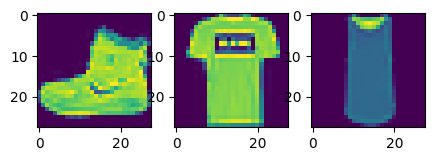

In [7]:
sample1 = train_images[0]
sample2 = train_images[1]
sample3 = train_images[2]
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (5,5))
ax1.imshow(sample1)
ax2.imshow(sample2)
ax3.imshow(sample3)

## Preprocessing
The data that is used to train a neural network usually needs to be processed. For this example, we need to change the range of the value for each pixel from 0 to 255 to 0..1. This helps our NN to fit the data more easily. 

In [8]:
train_images = train_images / 255
test_images = test_images / 255

## Creating the model
 Next we create the model using keras Sequential. This gives us a sequential neural network. In the following code, we create a model that has 784 input nodes. In the next layer we have 120 nodes that are densely connected by the nodes in the previous layer. In the output layer there are 10 nodes that stand for the ten labels of the dataset.

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

After creating the structure of the model, we need to set other parameters. The loss function, the optimizer and the metrics using the compile method.

In [22]:
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

## Training the model
Finally we use fit method to train our model.

In the following example, we used batch size = 100, meaning that in each learning loop keras runs forward algorithm on 100 samples and then calculates the loss to update the gradient. Therefore, for 60000 samples we run the learning loop 600 times. We run this training session 10 times. Overal we update the weights 6000 times.  

In [23]:
model.fit(train_images , train_labels , epochs=10 , batch_size=100)

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5435 - accuracy: 0.8119
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4039 - accuracy: 0.8577
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3665 - accuracy: 0.8689
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3407 - accuracy: 0.8770
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8824
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3056 - accuracy: 0.8878
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2932 - accuracy: 0.8922
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2809 - accuracy: 0.8963
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2720 - accuracy: 0.8990
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2625 - accuracy: 0.9027

As you can see, the model gets better after each batch and and each epoch. However, we can also cancel the fitting process eralier using a kind of cancellation method!

The following code shows how we can use a callback function to cancel the training process when the loss value reached a specific threshold:

In [24]:
class LossCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("loss")< 0.4):
            print("\nReached 0.,6 accuracy")
            self.model.stop_training = True

loss = LossCallback()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])
model.fit(train_images , train_labels , epochs=10 , batch_size=100 , callbacks=[loss])

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.5450 - accuracy: 0.8133
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4027 - accuracy: 0.8575
Epoch 3/10
599/600 [============================>.] - ETA: 0s - loss: 0.3617 - accuracy: 0.8712
Reached 0.,6 accuracy
600/600 [==============================] - 1s 2ms/step - loss: 0.3615 - accuracy: 0.8712


## Evaluating the model
Now that we created a model that has accuracy of 90 percent on our training model, we need to evaluate it on our test data set. Because this is the accuracy on the test data set that really matters.

In [22]:
model.evaluate(test_images,test_labels , verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8809


[0.3465520739555359, 0.8809000253677368]

As you can see, the accuracy on the testing data set is lower, which means that our model is kind of overfitting over training data. So we should try other parameters and test the model again. For example, I think that if I reduce the value for epochs it would be a good idea to avoid overfiting. In the following code I use epoch = 2

In [23]:
model.fit(train_images , train_labels , epochs=2)

Epoch 1/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2354 - accuracy: 0.9120
Epoch 2/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2266 - accuracy: 0.9145


In [24]:
model.evaluate(test_images,test_labels , verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8830


[0.34626972675323486, 0.8830000162124634]

As you can see, the accuracy on test data is higher afterusging epoch = 2. This process is called hyper parameter tuning. We have to use the best options and this is done by experience and knowledge. 

## Using the model
We can use the model the predict the label of new images:

1/1 [==============================] - 0s 26ms/step
[[2.2617279e-02 1.5867032e-08 9.7221428e-01 4.4797679e-07 4.7165938e-03
  6.9269222e-11 4.0245865e-04 3.5284944e-09 8.8268334e-06 4.0095576e-05]]
Pullover


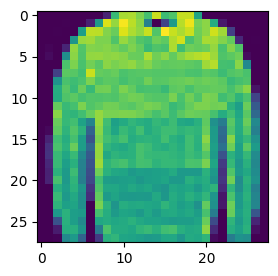

In [68]:
sample = test_images[20]
predictions = model.predict(sample)
print(predictions)
print(labels[np.argmax(predictions)])
fig , axes = plt.subplots(1,1,figsize=(3,3))
axes.imshow(sample)

In [1]:
import tensorflow as tf


2022-11-06 19:01:45.790094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
x = tf.ones(shape=(2,2))
y = tf.constant([[1.,2.],[3.,4.]])
print(x)
print(y)


tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [22]:
tf.matmul(x,y) # dot prduct

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 6.],
       [4., 6.]], dtype=float32)>

In [40]:
input_var  = tf.random.uniform(shape=(10,1))
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)


AttributeError: 'NoneType' object has no attribute 'items'

## Binary classification

Two-class classification, or binary classification, is one of the most common kinds of machine learning problems. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

For this example, we use IMDB dataset. Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.



In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

This dataset has 25000 traning sample and 25000 samples for evaluation.

In [5]:
print(test_data.shape)
print(train_data.shape)

(25000,)
(25000,)


We can use the word index to decode the samples to the original sentences:

In [26]:
word_index = imdb.get_word_index()
word_index_reversed = dict([(v,k) for k,v in word_index.items()])
def decode(sample):
    return " ".join([word_index_reversed.get(k-3,"?") for k in sample])


In [27]:
decode(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [29]:
decode(train_data[2])

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

As you can see, the trainning samples have different lengths:

In [11]:
[len(sample) for sample in train_data[:15]]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109]

However, neural networks need samples with equal lenghts to work. Therefore, we need a way to convert samples to the vectors with the same lengths.  There are two ways to do that:

1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, max_length), and start your model with a layer capa- ble of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book).

2. Multi-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vec- tor that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a Dense layer, capable of handling floating-point vector data, as the first layer in your model.

In [9]:
import numpy as np 
max_length = max([max(sample) for sample in train_data])
train_data_vectorized = np.zeros([len(train_data), max_length])

In [33]:
train_data_vectorized.shape

(25000, 9999)

In [10]:
def vectorize_sequences(samples, dimension=100000):
    results = np.zeros((len(samples), dimension))
    for i, sequence in enumerate(samples):
        for j in sequence:
            results[i, j] = 1.
    return results

In [11]:
train_x = vectorize_sequences(train_data)
test_x = vectorize_sequences(test_data)

Now, we define the structur of the neural network:

In [59]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")]
)

You may wonder why I chose 16 nodes for the first and the second layers, and 1 node for the output layer. First, I explain the thrid layer. Since our problem is a binary classification method, only one output node is enough to represent the final result. The final result of the sigmoid function is a number between 0 and 1, which is used to explain the probability of each class: a score between 0 and 1 indicating how likely the sample is to have the target “1”. The 1 is positive review and the label 0 is negative review.

Having 16 units in the first layer means the weight matrix W will have shape (input_dimension, 16): the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation). You can intuitively understand the dimensionality of your representation space as “how much freedom you’re allowing the model to have when learning internal representations.” Having more units (a higher-dimensional representation space) allows your model to learn more-complex representations, but it makes the model more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).

In our example, the input vector's dimension is 10000. So our first layer represents the input data of 10000 values with a 10000x16 weight mnatix. The shape of the weight matrix of the next layer is 16x16. And the final layer is 16x1.

After structuring the data, we compile the neural network by setting the tuning parameters:

In [62]:
model.compile(optimizer="rmsprop" , loss="binary_crossentropy" , metrics=["accuracy"])

For this example, it is best to use the binary_crossentropy loss. It isn’t the only viable choice: for instance, you could use mean_squared_error. But crossentropy is usually the best choice when you’re dealing with models that output probabilities. Crossentropy is a quantity from the field of infor- mation theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

As for the choice of the optimizer, we’ll go with rmsprop, which is a usually a good default choice for virtually any problem.


Now, We train the model for 10 epochs (10 iterations over all samples in the trainng data) in mini-batches of 512 samples.

In [63]:
model.fit(train_x , train_label, epochs=10, batch_size=512)

Epoch 1/10
49/49 [==============================] - 19s 318ms/step - loss: 0.4404 - accuracy: 0.8273
Epoch 2/10
49/49 [==============================] - 17s 339ms/step - loss: 0.2528 - accuracy: 0.9135
Epoch 3/10
49/49 [==============================] - 16s 331ms/step - loss: 0.1962 - accuracy: 0.9310
Epoch 4/10
49/49 [==============================] - 16s 326ms/step - loss: 0.1663 - accuracy: 0.9409
Epoch 5/10
49/49 [==============================] - 16s 321ms/step - loss: 0.1449 - accuracy: 0.9489
Epoch 6/10
49/49 [==============================] - 16s 320ms/step - loss: 0.1278 - accuracy: 0.9559
Epoch 7/10
49/49 [==============================] - 16s 321ms/step - loss: 0.1149 - accuracy: 0.9605
Epoch 8/10
49/49 [==============================] - 18s 367ms/step - loss: 0.0986 - accuracy: 0.9662
Epoch 9/10
49/49 [==============================] - 20s 404ms/step - loss: 0.0914 - accuracy: 0.9695
Epoch 10/10
49/49 [==============================] - 15s 305ms/step - loss: 0.0819 - accura

After traininng we can use evaluate method to test the model on new data. However, it is very common that we use a validation set to monitor the accuracy of the model during training. 

In [67]:
train_data_validation_part = train_x[:10000]
train_data_fit_part = train_x[10000:]
train_label_validation_part = train_label[:10000]
train_label_fit_part = train_label[10000:]

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")]
)

model.compile(optimizer="rmsprop" , loss="binary_crossentropy" , metrics=["accuracy"])
history = model.fit(train_data_fit_part , train_label_fit_part, epochs=10, batch_size=512 , validation_data=(train_data_validation_part,train_label_validation_part))

Epoch 1/10
30/30 [==============================] - 29s 895ms/step - loss: 0.5376 - accuracy: 0.7791 - val_loss: 0.4115 - val_accuracy: 0.8643
Epoch 2/10
30/30 [==============================] - 14s 478ms/step - loss: 0.3273 - accuracy: 0.9018 - val_loss: 0.3135 - val_accuracy: 0.8899
Epoch 3/10
30/30 [==============================] - 15s 506ms/step - loss: 0.2358 - accuracy: 0.9279 - val_loss: 0.2900 - val_accuracy: 0.8873
Epoch 4/10
30/30 [==============================] - 15s 504ms/step - loss: 0.1843 - accuracy: 0.9415 - val_loss: 0.2723 - val_accuracy: 0.8913
Epoch 5/10
30/30 [==============================] - 15s 513ms/step - loss: 0.1504 - accuracy: 0.9530 - val_loss: 0.2938 - val_accuracy: 0.8830
Epoch 6/10
30/30 [==============================] - 16s 536ms/step - loss: 0.1254 - accuracy: 0.9611 - val_loss: 0.3045 - val_accuracy: 0.8805
Epoch 7/10
30/30 [==============================] - 16s 551ms/step - loss: 0.1064 - accuracy: 0.9679 - val_loss: 0.3029 - val_accuracy: 0.8838

We can use the hitory object for further investigation! Now, I use this history method to print the validation and loss value for validation set for each epoch.

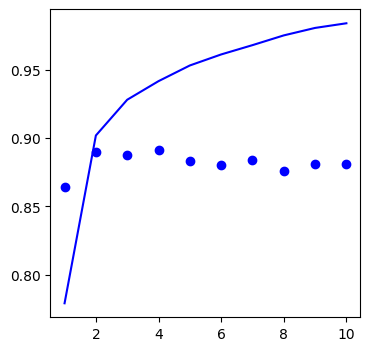

In [77]:
import matplotlib.pyplot as plt
history_dict = history.history
fig, axes = plt.subplots(1,1,figsize=(4,4))
epochs = range(1, len(history_dict["val_accuracy"])+1)
axes.plot(epochs, history_dict["val_accuracy"],"bo")
axes.plot(epochs, history_dict["accuracy"],"b")

As you can see, the accuracy on the training set increases every epoch, while the accuracy on the validation set bounces up and down after the second epoch. This example shows us that a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the fourth epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set. There are a range of techniques to mitigate overfitting that we will cover later.

## Multiclass classifiction

In this section, we’ll build a model to classify Reuters newswires into 46 mutually exclusive topics. Because we have many classes, this problem is an instance of multiclass classification, and because each data point should be classified into only one category, the problem is more specifically an instance of single-label multiclass classification.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
(train_data, train_label) , (test_data, test_label) = reuters.load_data(num_words=10000)

2022-11-14 17:17:12.070837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2110848/2110848 [==============================] - 3s 2us/step


As with the IMDB dataset, the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data. As with the IMDB reviews, each example is a list of integers, and you can use the reversed index in order to decode the samples.

The important difference between reuters dataset and the imdb dataset is the number of classes. We have 46 classes here, so we represent the labels using one-hot encoding.  One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

There is a builtin method to do this in keras:

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

In [5]:
print(y_train[0])
print(train_label[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3


In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In a stack of Dense layers like those we’ve been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottle- neck. In the previous example, we used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="sigmoid")
])

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [30]:
model.fit(train_x,y_train,epochs=2,batch_size=512)

Epoch 1/2
18/18 [==============================] - 8s 279ms/step - loss: 2.7064 - accuracy: 0.5247
Epoch 2/2
18/18 [==============================] - 3s 140ms/step - loss: 1.4623 - accuracy: 0.7072


In [36]:
predictions = model.predict(x_test[0:1])

1/1 [==============================] - 0s 29ms/step


In [41]:
predictions.sum()

14.486659

As you see, the sum of allprediction for classes is larger than 1 so this is not suitable. Therefore we change our activation function for the last layer.

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [43]:
model.fit(train_x,y_train,epochs=2,batch_size=512)

Epoch 1/2
18/18 [==============================] - 9s 286ms/step - loss: 2.6278 - accuracy: 0.5551
Epoch 2/2
18/18 [==============================] - 3s 149ms/step - loss: 1.3798 - accuracy: 0.7216


In [44]:
predictions = model.predict(x_test[0:1])
predictions.sum()

1/1 [==============================] - 0s 74ms/step


1.0

Now you see that the final sum returns 1 which shows that we have used an appropriate activation function to make up a correct probability distribution for 46 classes. The maximum probability shows the label that should be chosen for the sample:

In [46]:
print(np.argmax(predictions))

3


Lets increase the epochs and see the difference:

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history = model.fit(train_x[1000:],y_train[1000:],epochs=20,batch_size=512 , validation_data=(train_x[:1000],y_train[:1000]))

Epoch 1/20
16/16 [==============================] - 10s 410ms/step - loss: 2.7833 - accuracy: 0.5361 - val_loss: 1.8471 - val_accuracy: 0.6650
Epoch 2/20
16/16 [==============================] - 4s 278ms/step - loss: 1.4623 - accuracy: 0.7174 - val_loss: 1.3389 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 3s 174ms/step - loss: 1.0569 - accuracy: 0.7795 - val_loss: 1.1380 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 3s 169ms/step - loss: 0.8256 - accuracy: 0.8264 - val_loss: 1.0307 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 3s 178ms/step - loss: 0.6595 - accuracy: 0.8633 - val_loss: 0.9569 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 3s 171ms/step - loss: 0.5306 - accuracy: 0.8940 - val_loss: 0.9186 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 3s 168ms/step - loss: 0.4260 - accuracy: 0.9127 - val_loss: 0.9295 - val_accuracy: 0.8040
Epoch

As you see , the accuracy on the validation set increasesed until epoch 6 but then it bums up and down.


Instead of one-hot encoding, we can also use the original labels but use a loss function called sparse_categorical_crossentropy.

Here’s what you should take away from this example:
* If you’re trying to classify data points among N classes, your model should end with a Dense layer of size N.
* In a single-label, multiclass classification problem, your model should end with a softmax activation so that it will output a probability distribution over the N output classes.
* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the model and the true distribution of the targets.
* There are two ways to handle labels in multiclass classification:
 - Encoding the labels via categorical encoding (also known as one-hot encod-
ing) and using categorical_crossentropy as a loss function
 - Encoding the labels as integers and using the sparse_categorical_cross-
entropy loss function
* If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your model due to intermediate layers that are too small.